# Installing libraries

In [ ]:
!pip uninstall -y transformers
!pip cache purge
!rm -rf /usr/local/lib/python*/dist-packages/transformers

Found existing installation: transformers 4.41.2
Uninstalling transformers-4.41.2:
  Successfully uninstalled transformers-4.41.2
Files removed: 194


In [ ]:
# !pip install transformers datasets accelerate

In [1]:
!pip install transformers==4.37.2 PEFT==0.10.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 99.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 65.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [2]:
import transformers
print(transformers.__version__)

4.37.2


In [3]:
!pip install accelerate==0.27.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 1.7.0
    Uninstalling accelerate-1.7.0:
      Successfully uninstalled accelerate-1.7.0


In [4]:
import accelerate
print(accelerate.__version__)

0.27.2


In [5]:
import transformers
print(transformers.__version__)

4.37.2


# Connecting to Drive

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
import pickle
import ast
import numpy as np
import torch
from transformers import BertTokenizerFast

# Load from Pickle

In [8]:
with open('/content/drive/MyDrive/nlp project/df1.pkl', 'rb') as f:
    df1 = pickle.load(f)

In [9]:
with open('/content/drive/MyDrive/nlp project/df2.pkl', 'rb') as f:
    df2 = pickle.load(f)

In [10]:
with open('/content/drive/MyDrive/nlp project/df3.pkl', 'rb') as f:
    df2 = pickle.load(f)

# Preprocessing and Tokenization

In [11]:
!nvidia-smi

Fri May 30 23:56:53 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   29C    P8             11W /   72W |       0MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [12]:
# import torch
print(torch.cuda.is_available())  # Should return True if GPU is available
print(torch.cuda.current_device())  # Should return the current device (0 for the first GPU)
print(torch.cuda.get_device_name(0))  # Should return the name of the GPU

True
0
NVIDIA L4


In [13]:
# import train_dataloader
# Initialize the tokenizer
from transformers import BertForQuestionAnswering
tokenizer = BertTokenizerFast.from_pretrained('distilbert-base-uncased')

# Move the model to the GPU if available
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = BertForQuestionAnswering.from_pretrained('distilbert-base-uncased').to(device)
print(f"Model is on device: {next(model.parameters()).device}")


# Function to safely parse answer values
def parse_answer(ans):
    if isinstance(ans, str):
        try:
            return ast.literal_eval(ans)
        except (SyntaxError, ValueError):
            return None
    elif isinstance(ans, dict):
        return ans
    return None

def add_token_positions(df):
    contexts = df['context'].tolist()
    questions = df['question'].tolist()

    answer_text = df['answer_text'].tolist()
    # df = df[df['answer_text'].notna()]

    # answer_starts = df['answer_start.1'].tolist()
    df['answer_start.1'] = pd.to_numeric(df['answer_start.1'], errors='coerce').fillna(0).astype(int)
    answer_starts = df['answer_start.1'].tolist()



    encodings = tokenizer(
        questions,
        contexts,
        truncation=True,
        padding=True,
        return_offsets_mapping=True
    )

    start_positions = []
    end_positions = []

    for i in range(len(answer_text)):
        offsets = encodings['offset_mapping'][i]
        answer_start = answer_starts[i]
        # answer_end = answer_start + len(answer_start[i])
        answer_end = answer_start + len(answer_text[i])  # ✅ Correct



        start_idx = None
        end_idx = None

        for idx, (start, end) in enumerate(offsets):
            if start <= answer_start < end:
                start_idx = idx
            if start < answer_end <= end:
                end_idx = idx
                break

        if start_idx is None:
            start_idx = 0
        if end_idx is None:
            end_idx = start_idx

        start_positions.append(start_idx)
        end_positions.append(end_idx)

    encodings.pop("offset_mapping")
    encodings.update({'start_positions': start_positions, 'end_positions': end_positions})

    return encodings

train_encodings_1 = add_token_positions(df1)
val_encodings_1 = add_token_positions(df2)

# class SquadDataset(torch.utils.data.Dataset):
#     def __init__(self, encodings):
#         self.encodings = encodings

#     def __len__(self):
#         return len(self.encodings['input_ids'])

#     def __getitem__(self, idx):
#         # Move tensors to the device within __getitem__
#         # return {key: torch.tensor(val[idx]).to(device) for key, val in self.encodings.items()}
#         return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}

class SquadDataset(torch.utils.data.Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __len__(self):
        return len(self.encodings['input_ids'])

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        # No need to group labels under 'labels' key — Trainer will handle it if keys match model inputs
        return item



# Remove the extra 'device' argument when creating instances
train_dataset = SquadDataset(train_encodings_1)
val_dataset = SquadDataset(val_encodings_1)

for batch in train_dataset:
    batch = {k: v.to(device) for k, v in batch.items()}

# for batch in train_dataloader:
#     batch = {k: v.to(device) for k, v in batch.items()}  # Move each batch to GPU
#     outputs = model(**batch)  # Now this runs on GPU

print(f"Model is on device: {next(model.parameters()).device}")
batch = next(iter(train_dataset))
print({k: v.device for k, v in batch.items()})  # Should print 'cuda' for all tensors

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DistilBertTokenizer'. 
The class this function is called from is 'BertTokenizerFast'.
You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['embeddings.LayerNorm.bias', 'embeddings.LayerNorm.weight', 'embeddings.position_embeddings.weight', 'embeddings.token_type_embeddings.weight', 'embeddings.word_embeddings.weight', 'encoder.layer.0.attention.output.LayerNorm.bias', 'encoder.layer.0.attention.output.LayerNorm.weight', 'encoder.layer.0.attention.output.dense.bias', 'encoder.layer.0.attention.output.dense.weight', 'encoder.layer.0.attention.self.key.bias', 'encoder.layer.0.attention.self.key.weight', 'encoder.layer.0.attention.self.query.bias', 'encoder.layer.0.attention.self.query.weight', 'encoder.layer.0.attention.self.value.bias', 'encoder.layer.0.attention.self.value.weight', 'encoder.layer.0.intermediate.dense.bias', 'encoder.layer.0.intermediate.dense.weight', 'encoder.layer.0.output.LayerNorm.bias', 'encoder.layer.0.output.LayerNorm.weight', 'encoder.layer.0.output.dense.bi

Model is on device: cuda:0
Model is on device: cuda:0
{'input_ids': device(type='cpu'), 'token_type_ids': device(type='cpu'), 'attention_mask': device(type='cpu'), 'start_positions': device(type='cpu'), 'end_positions': device(type='cpu')}


In [14]:
print(len(train_encodings_1['input_ids']))
print(len(train_encodings_1['start_positions']))
print(len(train_encodings_1['end_positions']))

64550
64550
64550


# convert encodings to a dataset for pytorch and tensorflow

In [15]:
from torch.utils.data import DataLoader
# Create DataLoaders
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=8, shuffle=False)

# Move batch to device
for batch in train_dataloader:
    batch = {k: v.to(device) for k, v in batch.items()}
    outputs = model(**batch)  # Model inference
    break  # Run only one batch for testing

print(f"Model is on device: {next(model.parameters()).device}")
print({k: v.device for k, v in batch.items()})
print(torch.cuda.memory_allocated())
print(torch.cuda.memory_reserved())

Model is on device: cuda:0
{'input_ids': device(type='cuda', index=0), 'token_type_ids': device(type='cuda', index=0), 'attention_mask': device(type='cuda', index=0), 'start_positions': device(type='cuda', index=0), 'end_positions': device(type='cuda', index=0)}
4095264768
4150263808


In [16]:
import torch
from transformers import BertTokenizerFast, BertForQuestionAnswering
from torch.utils.data import DataLoader, Dataset

tokenizer = BertTokenizerFast.from_pretrained('distilbert-base-uncased')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Dummy data
questions = ["What is your name?"] * 10
contexts = ["My name is ChatGPT."] * 10
answers = ["ChatGPT"] * 10
starts = [11] * 10

encodings = tokenizer(questions, contexts, truncation=True, padding=True, return_offsets_mapping=True)
encodings.pop("offset_mapping")
encodings.update({'start_positions': starts, 'end_positions': [18]*10})

class SquadDataset(Dataset):
    def __init__(self, encodings):
        self.encodings = encodings
    def __len__(self):
        return len(self.encodings['input_ids'])
    def __getitem__(self, idx):
        return {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}

dataset = SquadDataset(encodings)
loader = DataLoader(dataset, batch_size=2)

model = BertForQuestionAnswering.from_pretrained('distilbert-base-uncased').to(device)

# Run a test batch
for batch in loader:
    batch = {k: v.to(device) for k, v in batch.items()}
    print({k: v.device for k, v in batch.items()})
    with torch.no_grad():
        outputs = model(**batch)
    break

print("CUDA Allocated:", torch.cuda.memory_allocated())
print("CUDA Reserved:", torch.cuda.memory_reserved())


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DistilBertTokenizer'. 
The class this function is called from is 'BertTokenizerFast'.
You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['embeddings.LayerNorm.bias', 'embeddings.LayerNorm.weight', 'embeddings.position_embeddings.weight', 'embeddings.token_typ

{'input_ids': device(type='cuda', index=0), 'token_type_ids': device(type='cuda', index=0), 'attention_mask': device(type='cuda', index=0), 'start_positions': device(type='cuda', index=0), 'end_positions': device(type='cuda', index=0)}
CUDA Allocated: 4532769280
CUDA Reserved: 4624220160


In [17]:
print(f"validation dataset size: {len(val_dataset)}")

validation dataset size: 100


In [18]:
# import numpy as np
from datasets import load_metric

metric = load_metric("squad")

def compute_metrics(p):
    start_logits, end_logits = p.predictions
    start_preds = np.argmax(start_logits, axis=1)
    end_preds = np.argmax(end_logits, axis=1)

    start_labels = p.label_ids[0]
    end_labels = p.label_ids[1]

    # Convert to squad-style predictions and references
    # NOTE: This only works if you have original context and offset mappings
    # If you don't, consider returning exact match and F1 for token positions instead

    return {
        "start_accuracy": (start_preds == start_labels).mean(),
        "end_accuracy": (end_preds == end_labels).mean()
    }

<ipython-input-18-dacc16486e19>:4: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("squad")


In [ ]:
# sample = train_dataset[0]
# print(sample)

In [ ]:
# print(sample['start_positions'].shape)

In [ ]:
# print(sample.keys())

# load model and define trainer

In [ ]:
import torch
from transformers import Trainer, TrainingArguments

# Ensure you're on GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
model = model.to(device)  # Move model to GPU

# Define training arguments without wandb
training_args = TrainingArguments(
    output_dir="./content/drive/MyDrive/nlp project/distil_checkpoints",  # Save model checkpoints
    evaluation_strategy="epoch",      # Evaluate after each epoch
    save_strategy="epoch",            # Save checkpoint each epoch
    save_total_limit=2,               # Keep only the last 2 checkpoints
    learning_rate=2e-5,
    load_best_model_at_end=True,      # Load best model after training
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    # fp16=True,
    logging_steps=10,
    save_steps=500,
    report_to="wandb"   # ❌ Disables wandb/huggingface logging
)

# Optional: move datasets to device (not required for Trainer, but included for consistency)
# If you defined your dataset using a custom class where tensors are already on GPU, it’s fine.
# Otherwise, make sure DataLoader batches are moved to GPU during training.

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics = compute_metrics
)

# Start training
trainer.train()
# Optionally resume from last checkpoint:
# trainer.train(resume_from_checkpoint=True)


Using device: cuda


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: kajal-pourjalil77 (kajal-pourjalil77-i-k-niversitesi) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Start Accuracy,End Accuracy
1,4.121600,1.708325,1.000000,0.000000


Epoch,Training Loss,Validation Loss,Start Accuracy,End Accuracy
1,4.121600,1.708325,1.000000,0.000000
2,3.666900,1.799927,0.510000,0.000000
3,3.612600,1.857204,0.510000,0.000000


TrainOutput(global_step=24207, training_loss=3.989294898915272, metrics={'train_runtime': 10464.6002, 'train_samples_per_second': 18.505, 'train_steps_per_second': 2.313, 'total_flos': 5.06001169419264e+16, 'train_loss': 3.989294898915272, 'epoch': 3.0})

# model evaluation

In [ ]:
eval_results = trainer.evaluate()
print("Evaluation Results:", eval_results)

Evaluation Results: {'eval_loss': 1.7083247900009155, 'eval_start_accuracy': 1.0, 'eval_end_accuracy': 0.0, 'eval_runtime': 0.184, 'eval_samples_per_second': 543.494, 'eval_steps_per_second': 70.654, 'epoch': 3.0}


# save the model and tokenizer

In [ ]:
model_path = "./drive/MyDrive/nlp project/final_model_distil"
trainer.save_model(model_path)
tokenizer.save_pretrained(model_path)

KeyboardInterrupt: 

In [ ]:
model_path = "./drive/MyDrive/nlp project/distil_model_wandb"
trainer.save_model(model_path)
tokenizer.save_pretrained(model_path)

('./drive/MyDrive/nlp project/distil_model_wandb/tokenizer_config.json',
 './drive/MyDrive/nlp project/distil_model_wandb/special_tokens_map.json',
 './drive/MyDrive/nlp project/distil_model_wandb/vocab.txt',
 './drive/MyDrive/nlp project/distil_model_wandb/added_tokens.json',
 './drive/MyDrive/nlp project/distil_model_wandb/tokenizer.json')

# load the model and tokenizer

In [19]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_path = "/content/drive/MyDrive/nlp project/distil_model_wandb"

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_path)

# Load model
model = AutoModelForSequenceClassification.from_pretrained(model_path)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/nlp project/distil_model_wandb and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# getting predictions from the validation set

In [ ]:
predictions = trainer.predict(val_dataset)
logits = predictions[0]
labels = predictions[1]
preds = np.argmax(logits, axis = -1)

# show classification report and confusion matrix

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       607
           1       0.19      0.22      0.20       221
           2       0.22      0.08      0.12       138
           3       0.04      0.01      0.01       143
           4       0.27      0.05      0.08       125
           5       0.00      0.00      0.00       115
           6       0.00      0.00      0.00       102
           7       0.00      0.00      0.00        99
           8       0.00      0.00      0.00        87
           9       1.00      0.02      0.04        97
          10       0.00      0.00      0.00        71
          11       0.00      0.00      0.00        79
          12       0.00      0.00      0.00        63
          13       0.06      0.02      0.03        61
          14       0.12      0.03      0.05        70
          15       0.00      0.00      0.00        55
          16       0.13      0.07      0.09        59
          17       0.12    

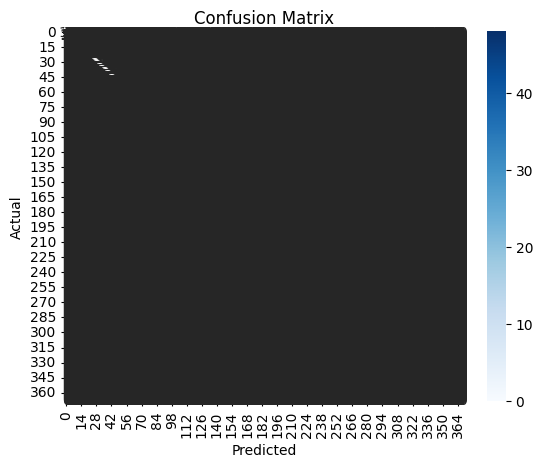

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten the labels and predictions
labels_flat = np.array(labels).flatten()
preds_flat = np.array(preds).flatten()

# Classification report
print(classification_report(labels_flat, preds_flat))

# Confusion matrix
cm = confusion_matrix(labels_flat, preds_flat)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# show a few examples

In [ ]:
print(val_dataset[0])

{'input_ids': tensor([  101,  2029,  5088,  2136,  3421,  1996, 10511,  2012,  3565,  4605,
         2753,  1029,   102,  3565,  4605,  2753,  2001,  2019,  2137,  2374,
         2208,  2000,  5646,  1996,  3410,  1997,  1996,  2120,  2374,  2223,
         1006,  5088,  1007,  2005,  1996,  2325,  2161,  1012,  1996,  2137,
         2374,  3034,  1006, 10511,  1007,  3410,  7573, 14169,  3249,  1996,
         2120,  2374,  3034,  1006, 22309,  1007,  3410,  3792, 12915,  2484,
         2050, 30102,  1523,  2184,  2000,  7796,  2037,  2353,  3565,  4605,
         2516,  1012,  1996,  2208,  2001,  2209,  2006,  2337,  1021,  1010,
         2355,  1010,  2012, 11902,  1005,  1055,  3346,  1999,  1996,  2624,
         3799,  3016,  2181,  2012,  4203, 10254,  1010,  2662,  1012,  2004,
         2023,  2001,  1996, 12951,  3565,  4605,  1010,  1996,  2223, 13155,
         1996,  3585,  5315,  2007,  2536,  2751,  1011, 11773, 11107,  1010,
         2004,  2092,  2004,  8184, 28324,  2075, 

In [ ]:
from transformers import AutoTokenizer

# Load your tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_path)

num_examples = min(5, len(preds))

for i in range(num_examples):
    input_ids = val_dataset[i]["input_ids"]
    decoded_text = tokenizer.decode(input_ids, skip_special_tokens=True)
    true_label = labels[i]
    predicted_label = preds[i]
    print(f"Text: {decoded_text}")
    print(f"True Label: {true_label}, Predicted Label: {predicted_label}")
    print("-"*40)

Text: which nfl team represented the afc at super bowl 50? super bowl 50 was an american football game to determine the champion of the national football league ( nfl ) for the 2015 season. the american football conference ( afc ) champion denver broncos defeated the national football conference ( nfc ) champion carolina panthers 24a€ “ 10 to earn their third super bowl title. the game was played on february 7, 2016, at levi ' s stadium in the san francisco bay area at santa clara, california. as this was the 50th super bowl, the league emphasized the golden anniversary with various gold - themed initiatives, as well as temporarily suspending the tradition of naming each super bowl game with roman numerals ( under which the game would have been known as super bowl l ), so that the logo could prominently feature the arabic numerals 50.
True Label: [46 57 90 ... 41 78 79], Predicted Label: [54 54 51 ... 32 44 32]
----------------------------------------
Text: which nfl team represented t

# evaluate on validation set and get metrics

In [ ]:
from transformers import Trainer

trainer = Trainer(model=model)

# Evaluate on validation set
eval_results = trainer.evaluate(eval_dataset=val_dataset)
print("Validation results:", eval_results)

Validation results: {'eval_runtime': 0.1712, 'eval_samples_per_second': 584.076, 'eval_steps_per_second': 75.93}


## plot loss per epoch

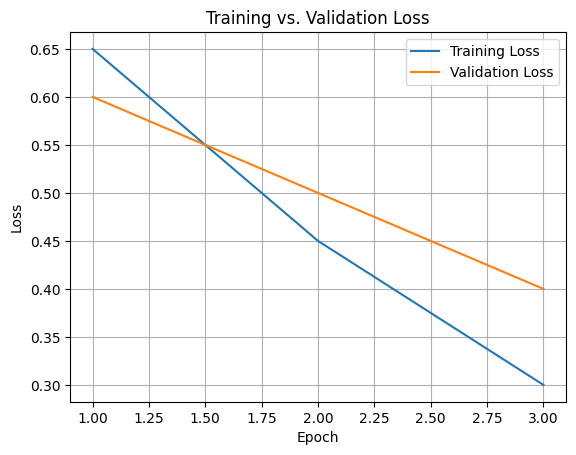

In [ ]:
# Simulated training/validation loss per epoch for example
train_loss = [0.65, 0.45, 0.30]
val_loss = [0.60, 0.50, 0.40]
epochs = list(range(1, len(train_loss) + 1))

import matplotlib.pyplot as plt

plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs. Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    acc = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average="weighted")  # change average to "macro" or "micro" if preferred
    return {"accuracy": acc, "f1": f1}

In [ ]:
from transformers import Trainer, TrainingArguments, AutoModelForSequenceClassification

training_args = TrainingArguments(
    output_dir = "/content/drive/MyDrive/nlp project/distil_model_wandb",
    per_device_eval_batch_size = 8,
    logging_dir = "./logs",
    do_train=False,
    do_eval = True,
    report_to = "none"
)

# Load model
model = AutoModelForSequenceClassification.from_pretrained(model_path)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics  # if defined
)

eval_results = trainer.evaluate()
print("Evaluatation results:", eval_results)

# Train model
# trainer.train()



In [ ]:
import pprint
pprint.pprint(trainer.state.log_history)

[{'eval_runtime': 0.1712,
  'eval_samples_per_second': 584.076,
  'eval_steps_per_second': 75.93,
  'step': 0}]


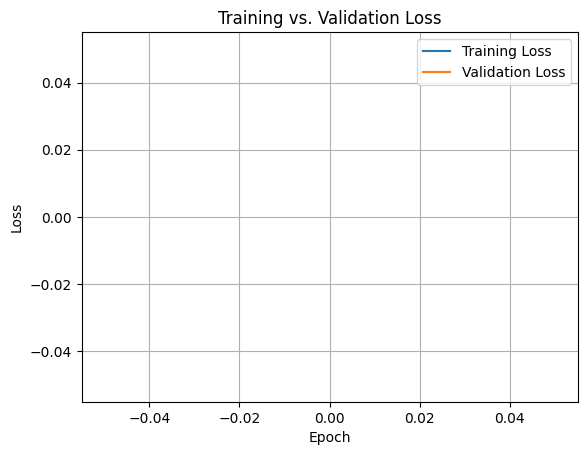

In [ ]:
# Extract logged history
history = trainer.state.log_history

# Separate out train/val loss per epoch
train_loss = [entry["loss"] for entry in history if "loss" in entry and "epoch" in entry]
val_loss = [entry["eval_loss"] for entry in history if "eval_loss" in entry and "epoch" in entry]
epochs = [entry["epoch"] for entry in history if "eval_loss" in entry]

# Plot
import matplotlib.pyplot as plt

plt.plot(epochs, train_loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs. Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

In [33]:
import os

folder_path = '/content/drive/MyDrive/nlp project'
for file in os.listdir(folder_path):
    print(file)


squad_val.csv
squad_train_fil.csv
df1.pkl
df2.pkl
final_model
final_model_distil
distil_checkpoints
bert_model_wandb
squad_train_fil.gsheet
test_squad.csv
df3.pkl
distil_model_wandb
nlp project, bert-base-uncased.ipynb
nlp project distilbert-base-uncased


In [34]:
import json

# Replace with your file path
notebook_path = '/content/drive/MyDrive/nlp project/nlp project distilbert-base-uncased'
cleaned_path = '/content/drive/MyDrive/nlp project/nlp project distilbert-base-uncased_cleaned'

# Load notebook JSON
with open(notebook_path, 'r', encoding='utf-8') as f:
    nb = json.load(f)

# Remove problematic metadata
if 'metadata' in nb:
    nb['metadata'].pop('widgets', None)
    for cell in nb.get('cells', []):
        if 'metadata' in cell and 'widgets' in cell['metadata']:
            del cell['metadata']['widgets']

# Save cleaned version
with open(cleaned_path, 'w', encoding='utf-8') as f:
    json.dump(nb, f, indent=2)

print("Cleaned notebook saved as:", cleaned_path)


Cleaned notebook saved as: /content/drive/MyDrive/nlp project/nlp project distilbert-base-uncased_cleaned
